In [1]:
#do all the imports

import pandas as pd
import glob
import json
import numpy as np
import pandas as pd
import csv
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
os.getcwd()  #just checking what directory we are workign in

'C:\\Users\\patti\\LearnPython\\prideProject'

In [3]:
#read in the CSV of tweets 
df=pd.read_csv("tweet_df.csv")


In [4]:
# initial data cleaning


df = df.replace({'\n': ' '}, regex=True) # remove linebreaks in the dataframe
df = df.replace({'\t': ' '}, regex=True) # remove tabs in the dataframe
df = df.replace({'\r': ' '}, regex=True) # remove carriage return in the dataframe
df.rename(columns={'text':'tweet', 'compound':'compound_score'}, inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,tweet,url,user_id,usernameTweet,team
0,0,0,1004467998592190000,6/6/2018 17:00,NaN,False,False,NaN,2,0,0,Hey @Angels we are waiting...signed your loya...,/AarontheBaaron/status/1004467998592196614,26010109,AarontheBaaron,angels
1,1,1,1014169422544580000,7/3/2018 11:30,NaN,False,False,NaN,34,2,5,OMG @ANGELS YESSSSS! Finally doing the thing....,/OhItsRicardo_/status/1014169422544580608,19224173,OhItsRicardo_,angels
2,2,2,1015540312406670000,7/7/2018 6:17,True,False,False,['https://t.co/1onwI19FwF'],1,0,0,27-time #WorldSeries Champions #NewYork @Yan...,/newstruthliz/status/1015540312406675462,377904401,newstruthliz,angels
3,3,3,1020145195621330000,7/19/2018 23:15,NaN,False,False,NaN,9,2,1,Are you a woman? Do you like @Angels baseball...,/OhItsRicardo_/status/1020145195621339137,19224173,OhItsRicardo_,angels
4,4,4,1052967828909940000,10/18/2018 13:01,NaN,False,False,NaN,488,16,90,We're proud to join @MLB in taking a stand ag...,/Angels/status/1052967828909944832,39392910,Angels,angels


In [5]:
#build a process that does basic data cleaning; we will use it later
import re
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",tweet.lower()).split())

In [6]:
#initialize the Vader library

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [7]:
#create the analyzer function

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [8]:
#test the analyzer using a random sentence we input

sentiment_analyzer_scores("This game is really dumb.")

This game is really dumb.--------------- {'neg': 0.473, 'neu': 0.527, 'pos': 0.0, 'compound': -0.5563}


In [9]:
sentiment_analyzer_scores("I don't like either of these teams and I wish they could both lose.")

I don't like either of these teams and I wish they could both lose. {'neg': 0.291, 'neu': 0.545, 'pos': 0.164, 'compound': -0.2755}


In [10]:
#begin the sentiment analysis by calling the analyzer, creating an empty list, and looping through the df to analyze the tweet row

sid = SentimentIntensityAnalyzer()


listy = []

for index, row in df.iterrows():
  ss = sid.polarity_scores(row["tweet"])
  listy.append(ss)

se = pd.Series(listy)
df['polarity'] = se.values

display(df.head(10))

,Unnamed: 0,Unnamed: 0.1,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,tweet,url,user_id,usernameTweet,team,polarity
0,0,0,1004467998592190000,6/6/2018 17:00,NaN,False,False,NaN,2,0,0,Hey @Angels we are waiting...signed your loya...,/AarontheBaaron/status/1004467998592196614,26010109,AarontheBaaron,angels,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou..."
1,1,1,1014169422544580000,7/3/2018 11:30,NaN,False,False,NaN,34,2,5,OMG @ANGELS YESSSSS! Finally doing the thing....,/OhItsRicardo_/status/1014169422544580608,19224173,OhItsRicardo_,angels,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp..."
2,2,2,1015540312406670000,7/7/2018 6:17,True,False,False,['https://t.co/1onwI19FwF'],1,0,0,27-time #WorldSeries Champions #NewYork @Yan...,/newstruthliz/status/1015540312406675462,377904401,newstruthliz,angels,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp..."
3,3,3,1020145195621330000,7/19/2018 23:15,NaN,False,False,NaN,9,2,1,Are you a woman? Do you like @Angels baseball...,/OhItsRicardo_/status/1020145195621339137,19224173,OhItsRicardo_,angels,"{'neg': 0.055, 'neu': 0.571, 'pos': 0.374, 'co..."
4,4,4,1052967828909940000,10/18/2018 13:01,NaN,False,False,NaN,488,16,90,We're proud to join @MLB in taking a stand ag...,/Angels/status/1052967828909944832,39392910,Angels,angels,"{'neg': 0.148, 'neu': 0.53, 'pos': 0.322, 'com..."
5,5,5,1052987037735770000,10/18/2018 14:17,NaN,True,False,NaN,0,0,0,# Angels social media representative LITERALL...,/Anonymous583/status/1052987037735776256,269670945,Anonymous583,angels,"{'neg': 0.24, 'neu': 0.693, 'pos': 0.067, 'com..."
6,6,6,1053043222816210000,10/18/2018 18:00,NaN,False,False,NaN,5,2,5,"Noticed the @Nationals didn't mention "" LGBTQ...",/queerfancystats/status/1053043222816219136,736744852080054000,queerfancystats,angels,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,7,7,1053059492601040000,10/18/2018 19:05,NaN,True,False,NaN,1,1,0,"To quote @larrywilmore , ""saying the word gay ...",/flautista21/status/1053059492601044993,49806394,flautista21,angels,"{'neg': 0.115, 'neu': 0.755, 'pos': 0.13, 'com..."
8,8,8,1053062388319160000,10/18/2018 19:16,NaN,True,False,NaN,1,0,2,The Red Sox are what I'd call tier 1A. They QT...,/queerfancystats/status/1053062388319162371,736744852080054000,queerfancystats,angels,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,9,9,1053995842296780000,10/21/2018 9:06,NaN,True,False,NaN,0,1,0,Huh? LGBTQ youth? Where are the parents? W...,/RAROTH2/status/1053995842296782848,2329137653,RAROTH2,angels,"{'neg': 0.235, 'neu': 0.577, 'pos': 0.188, 'co..."


In [11]:
#keeping this syntax in case we need it for anything later 
#but it actually prevents the split-and-merge technique (used a bit later) from working
#that's because that technique works only on a list, and taking out the braces makes it not be a list any more

#strip off the last character } since it breaks the splitter
#df['polarity'] = df['polarity'].map(lambda x: str(x)[:-1])



In [12]:
#df.polarity.apply(pd.Series) #just doing this to check that it works and actually splits the columns like we want
#keeping the syntax but commenting it out for now, as running it makes the notebook really long

In [13]:
#create a series from the list within the polarity column and append the series to the main dataframe
#basically we're splitting the polarity column and putting its components into 3 other columns


df2=df.polarity.apply(pd.Series) \
    .merge(df, left_index = True, right_index = True)

In [14]:
df2.head()

,neg,neu,pos,compound,Unnamed: 0,Unnamed: 0.1,ID,datetime,has_media,is_reply,...,medias,nbr_favorite,nbr_reply,nbr_retweet,tweet,url,user_id,usernameTweet,team,polarity
0,0.000,0.780,0.220,0.4767,0,0,1004467998592190000,6/6/2018 17:00,NaN,False,...,NaN,2,0,0,Hey @Angels we are waiting...signed your loya...,/AarontheBaaron/status/1004467998592196614,26010109,AarontheBaaron,angels,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou..."
1,0.000,0.832,0.168,0.8585,1,1,1014169422544580000,7/3/2018 11:30,NaN,False,...,NaN,34,2,5,OMG @ANGELS YESSSSS! Finally doing the thing....,/OhItsRicardo_/status/1014169422544580608,19224173,OhItsRicardo_,angels,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp..."
2,0.000,0.901,0.099,0.5267,2,2,1015540312406670000,7/7/2018 6:17,True,False,...,['https://t.co/1onwI19FwF'],1,0,0,27-time #WorldSeries Champions #NewYork @Yan...,/newstruthliz/status/1015540312406675462,377904401,newstruthliz,angels,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp..."
3,0.055,0.571,0.374,0.9399,3,3,1020145195621330000,7/19/2018 23:15,NaN,False,...,NaN,9,2,1,Are you a woman? Do you like @Angels baseball...,/OhItsRicardo_/status/1020145195621339137,19224173,OhItsRicardo_,angels,"{'neg': 0.055, 'neu': 0.571, 'pos': 0.374, 'co..."
4,0.148,0.530,0.322,0.5562,4,4,1052967828909940000,10/18/2018 13:01,NaN,False,...,NaN,488,16,90,We're proud to join @MLB in taking a stand ag...,/Angels/status/1052967828909944832,39392910,Angels,angels,"{'neg': 0.148, 'neu': 0.53, 'pos': 0.322, 'com..."


In [15]:
df2.rename(columns={'text':'tweet', 'compound':'compound_score'}, inplace=True)
df2.head()

,neg,neu,pos,compound_score,Unnamed: 0,Unnamed: 0.1,ID,datetime,has_media,is_reply,...,medias,nbr_favorite,nbr_reply,nbr_retweet,tweet,url,user_id,usernameTweet,team,polarity
0,0.000,0.780,0.220,0.4767,0,0,1004467998592190000,6/6/2018 17:00,NaN,False,...,NaN,2,0,0,Hey @Angels we are waiting...signed your loya...,/AarontheBaaron/status/1004467998592196614,26010109,AarontheBaaron,angels,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou..."
1,0.000,0.832,0.168,0.8585,1,1,1014169422544580000,7/3/2018 11:30,NaN,False,...,NaN,34,2,5,OMG @ANGELS YESSSSS! Finally doing the thing....,/OhItsRicardo_/status/1014169422544580608,19224173,OhItsRicardo_,angels,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp..."
2,0.000,0.901,0.099,0.5267,2,2,1015540312406670000,7/7/2018 6:17,True,False,...,['https://t.co/1onwI19FwF'],1,0,0,27-time #WorldSeries Champions #NewYork @Yan...,/newstruthliz/status/1015540312406675462,377904401,newstruthliz,angels,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp..."
3,0.055,0.571,0.374,0.9399,3,3,1020145195621330000,7/19/2018 23:15,NaN,False,...,NaN,9,2,1,Are you a woman? Do you like @Angels baseball...,/OhItsRicardo_/status/1020145195621339137,19224173,OhItsRicardo_,angels,"{'neg': 0.055, 'neu': 0.571, 'pos': 0.374, 'co..."
4,0.148,0.530,0.322,0.5562,4,4,1052967828909940000,10/18/2018 13:01,NaN,False,...,NaN,488,16,90,We're proud to join @MLB in taking a stand ag...,/Angels/status/1052967828909944832,39392910,Angels,angels,"{'neg': 0.148, 'neu': 0.53, 'pos': 0.322, 'com..."


In [16]:
df2.compound_score.unique()  #view the range of unique values in the compound_score, so we can make the right labels

array([ 0.4767,  0.8585,  0.5267, ..., -0.7668, -0.8957,  0.8449])

In [17]:
#define the process for marking the tweet score
#basically we are checking the value of the compound_score column and returning another value

def label_mark (row):
    
 
    if  row['compound_score']<=-0.6 :
        return '1'
   
    if  row['compound_score']<=-0.2 :
        return '2'
    if  row['compound_score']<=0.19 :
          return '3'
    if  row['compound_score']<=0.59 :
          return '4' 
       
    if  row['compound_score']>=0.591 :
          return '5'

  
    

#df = df[(df['closing_price']>=99 ) & (df['closing_price']<=101)]

In [18]:
#df2.apply (lambda row: label_mark(row), axis=1) #this is just to display what the labels will be, should we choose to assign them
#commenting it out, as running it makes the notebook really long

In [19]:
df2['tweet_grade'] = df2.apply (lambda row: label_mark(row), axis=1) #this assigns the labels into a new column 

In [20]:
df2.tweet_grade.unique() #here we are checking to make sure there are no un-graded items and no unused values

array(['4', '5', '1', '3', '2'], dtype=object)

In [21]:
df2.to_csv('Pride_Graded_tweets_Part_2.csv', index=True)

In [22]:
#change some column formats

df2['datetime']= pd.to_datetime(df2['datetime']) 

df2['shortdate'] = df2['datetime'].dt.date
df2['shortdate'] = df2['shortdate'].astype(str)
df2['stringdate'] = df2['shortdate'].astype(str)


df2.head()

,neg,neu,pos,compound_score,Unnamed: 0,Unnamed: 0.1,ID,datetime,has_media,is_reply,...,nbr_retweet,tweet,url,user_id,usernameTweet,team,polarity,tweet_grade,shortdate,stringdate
0,0.000,0.780,0.220,0.4767,0,0,1004467998592190000,2018-06-06 17:00:00,NaN,False,...,0,Hey @Angels we are waiting...signed your loya...,/AarontheBaaron/status/1004467998592196614,26010109,AarontheBaaron,angels,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou...",4,2018-06-06,2018-06-06
1,0.000,0.832,0.168,0.8585,1,1,1014169422544580000,2018-07-03 11:30:00,NaN,False,...,5,OMG @ANGELS YESSSSS! Finally doing the thing....,/OhItsRicardo_/status/1014169422544580608,19224173,OhItsRicardo_,angels,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...",5,2018-07-03,2018-07-03
2,0.000,0.901,0.099,0.5267,2,2,1015540312406670000,2018-07-07 06:17:00,True,False,...,0,27-time #WorldSeries Champions #NewYork @Yan...,/newstruthliz/status/1015540312406675462,377904401,newstruthliz,angels,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",4,2018-07-07,2018-07-07
3,0.055,0.571,0.374,0.9399,3,3,1020145195621330000,2018-07-19 23:15:00,NaN,False,...,1,Are you a woman? Do you like @Angels baseball...,/OhItsRicardo_/status/1020145195621339137,19224173,OhItsRicardo_,angels,"{'neg': 0.055, 'neu': 0.571, 'pos': 0.374, 'co...",5,2018-07-19,2018-07-19
4,0.148,0.530,0.322,0.5562,4,4,1052967828909940000,2018-10-18 13:01:00,NaN,False,...,90,We're proud to join @MLB in taking a stand ag...,/Angels/status/1052967828909944832,39392910,Angels,angels,"{'neg': 0.148, 'neu': 0.53, 'pos': 0.322, 'com...",4,2018-10-18,2018-10-18


In [23]:
#group and count the tweets

groups_df=pd.DataFrame(df2.groupby(['team', 'tweet_grade']).size().reset_index(name='tweet'))

In [24]:
groups_df.head()

,team,tweet_grade,tweet
0,angels,1,5
1,angels,2,12
2,angels,3,39
3,angels,4,38
4,angels,5,47


In [25]:
groups_df.team.unique()

array(['angels', 'athletics', 'bluejays', 'braves', 'brewers',
       'cardinals', 'cubs', 'dbacks', 'dodgers', 'giants', 'mariners',
       'marlins', 'mets', 'mlb_general', 'nationals', 'padres',
       'phillies', 'pirates', 'rays', 'reds', 'redsox', 'rockies',
       'royals', 'tigers', 'twins', 'whitesox', 'yankees'], dtype=object)

In [26]:
#cleaning some stuff up in the datarame to make it easier to make a pretty plot
#dropping out the "mlb_general" grouping since it skews the numbers
#making a separate column based off of the tweet count, to make it easier to manipulate the bubble size
#put it all into a ne dataframe
groups_df2=groups_df[groups_df.team != 'mlb_general']
groups_df2['tweet_grade'] = pd.to_numeric(groups_df2['tweet_grade'])
groups_df2['bubble_size']= groups_df2.tweet*20
 
 

C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [27]:
groups_df2.head()

,team,tweet_grade,tweet,bubble_size
0,angels,1,5,100
1,angels,2,12,240
2,angels,3,39,780
3,angels,4,38,760
4,angels,5,47,940


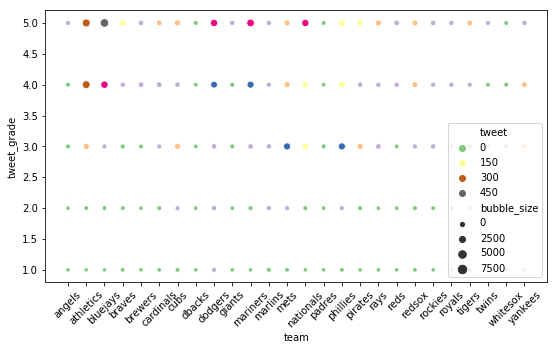

In [28]:

plt.figure(figsize=(9, 5))
ax = sns.scatterplot(x="team", y="tweet_grade",
                      hue="tweet", size='bubble_size',
                      palette="Accent",
                     data=groups_df2)
for item in ax.get_xticklabels():
    item.set_rotation(45)

Text(0, 0.5, 'Tweet Score')

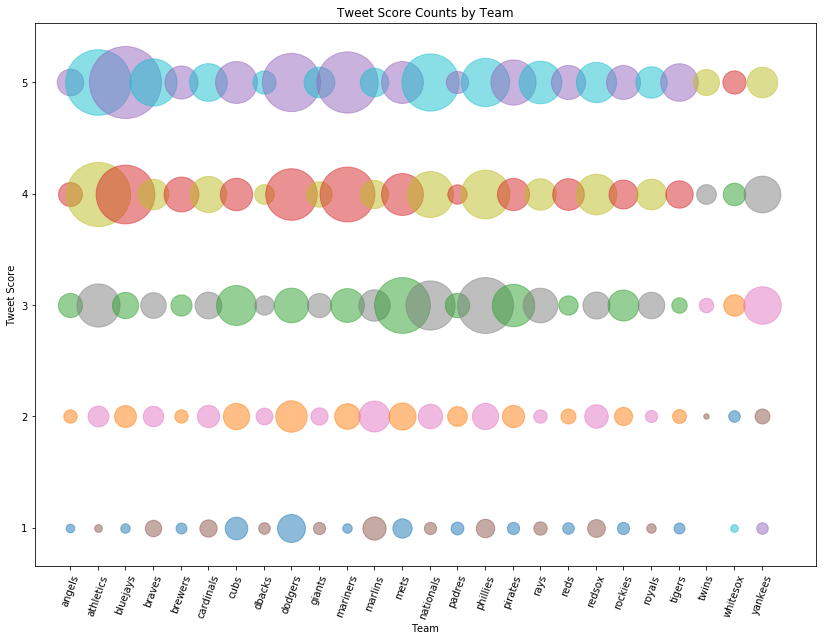

In [29]:



#ax = sns.scatterplot(x="team", y="tweet_grade",s=("tweet"), data=groups_df)


#c = groups_df2['tweet_grade']
fig, ax = plt.subplots(facecolor='w',figsize=(14,10))
plt.xticks(rotation=70)

for key, row in groups_df2.iterrows():
    ax.scatter(row['team'], row['tweet_grade'], cmap = 'RdPu', s=row['tweet']*15,alpha=.5)
    
plt.title("Tweet Score Counts by Team")
plt.xlabel("Team")
plt.ylabel("Tweet Score")


In [30]:
#save the groups_df to a csv file

groups_df.to_csv("grouped_tweets_without_mlb.csv")

C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


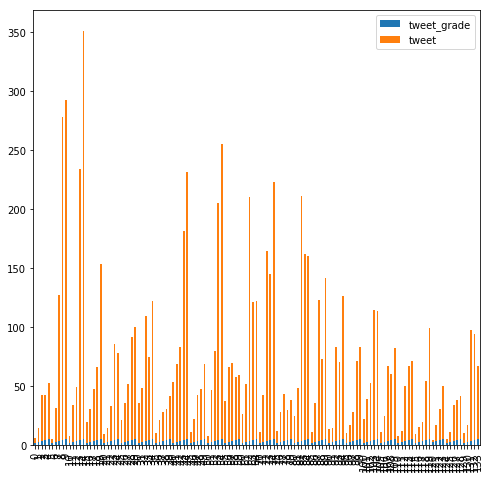

In [31]:
groups_df3=groups_df[groups_df.team != 'mlb_general']
groups_df3['tweet_grade'] = pd.to_numeric(groups_df3['tweet_grade'])
  


groups_df3.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [32]:
groups_df3.dtypes

team           object
tweet_grade     int64
tweet           int64
dtype: object

In [33]:
#reshape the data -this might help us plot it

reshaped_df=groups_df3.pivot(index='team', columns='tweet_grade', values='tweet')
reshaped_df

tweet_grade,1,2,3,4,5
team,,,,,
angels,5.0,12.0,39.0,38.0,47.0
athletics,4.0,29.0,124.0,274.0,287.0
bluejays,6.0,32.0,46.0,230.0,346.0
braves,18.0,28.0,44.0,62.0,148.0
brewers,8.0,12.0,30.0,81.0,73.0
cardinals,20.0,33.0,48.0,87.0,95.0
cubs,34.0,46.0,106.0,70.0,117.0
dbacks,9.0,19.0,25.0,26.0,36.0
dodgers,52.0,66.0,80.0,177.0,226.0


In [34]:
reshaped_df.reset_index(drop=True)
reshaped_df.head()

tweet_grade,1,2,3,4,5
team,,,,,
angels,5.0,12.0,39.0,38.0,47.0
athletics,4.0,29.0,124.0,274.0,287.0
bluejays,6.0,32.0,46.0,230.0,346.0
braves,18.0,28.0,44.0,62.0,148.0
brewers,8.0,12.0,30.0,81.0,73.0


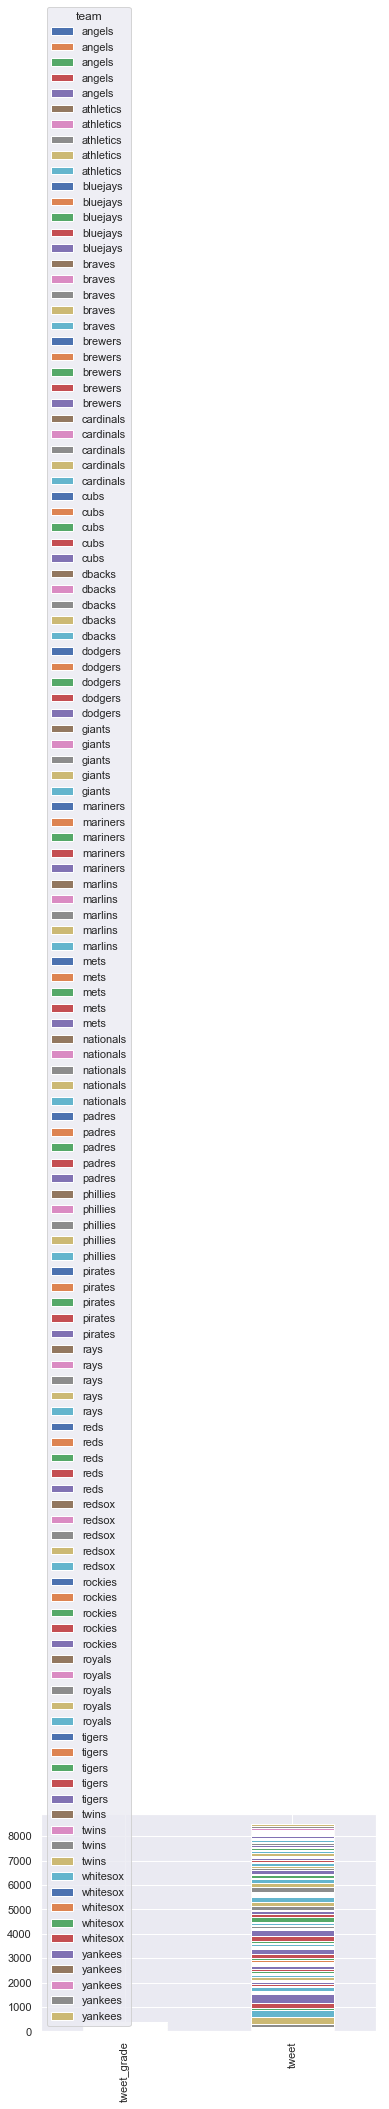

In [35]:
sns.set()
groups_df3.set_index('team').T.plot(kind='bar', stacked=True)

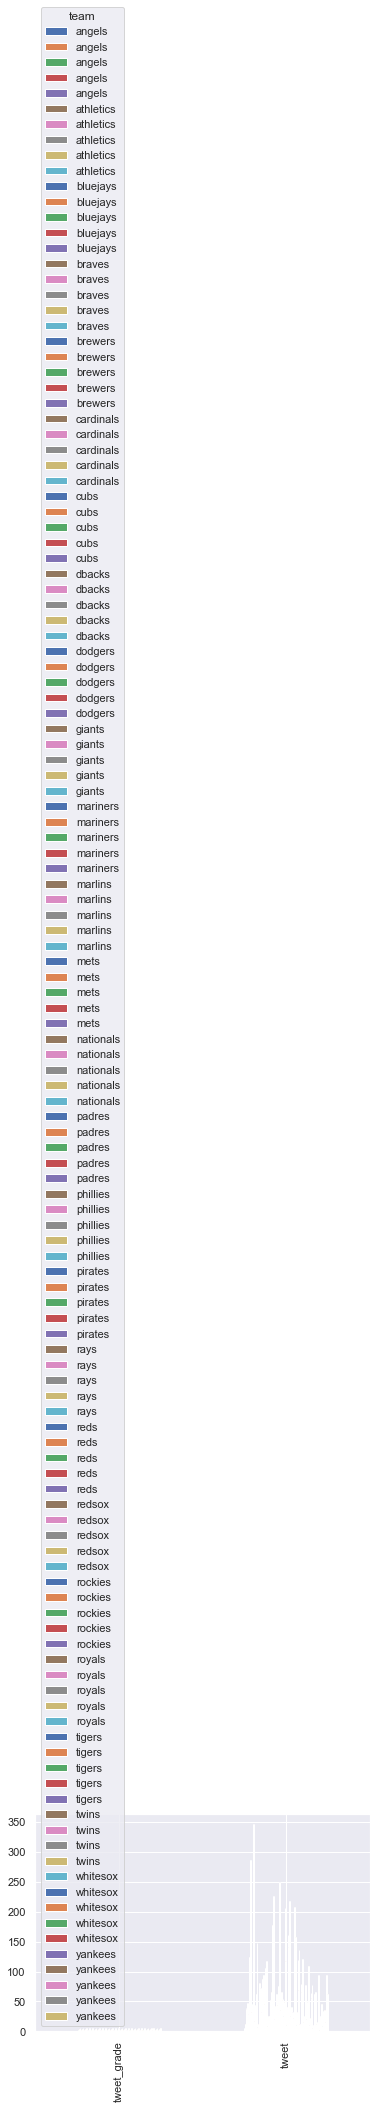

In [36]:
sns.set()
groups_df3.set_index('team').T.plot(kind='bar', stacked=False)

NameError: name 'df_counts' is not defined

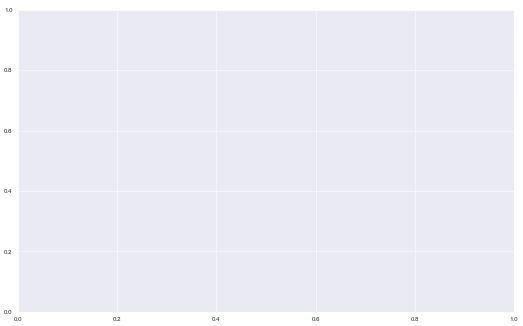

In [37]:
#reference https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#4.-Jittering-with-stripplot

fig, ax = plt.subplots(figsize=(16,10), dpi= 40)
sns.stripplot(df_counts.team, df_counts.tweet_grade,size=df_counts.counts, ax=ax)


plt.title('Tweets by Grade and Team', fontsize=22)

plt.show()

In [39]:

df2.head()



,neg,neu,pos,compound_score,Unnamed: 0,Unnamed: 0.1,ID,datetime,has_media,is_reply,...,nbr_retweet,tweet,url,user_id,usernameTweet,team,polarity,tweet_grade,shortdate,stringdate
0,0.000,0.780,0.220,0.4767,0,0,1004467998592190000,2018-06-06 17:00:00,NaN,False,...,0,Hey @Angels we are waiting...signed your loya...,/AarontheBaaron/status/1004467998592196614,26010109,AarontheBaaron,angels,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou...",4,2018-06-06,2018-06-06
1,0.000,0.832,0.168,0.8585,1,1,1014169422544580000,2018-07-03 11:30:00,NaN,False,...,5,OMG @ANGELS YESSSSS! Finally doing the thing....,/OhItsRicardo_/status/1014169422544580608,19224173,OhItsRicardo_,angels,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...",5,2018-07-03,2018-07-03
2,0.000,0.901,0.099,0.5267,2,2,1015540312406670000,2018-07-07 06:17:00,True,False,...,0,27-time #WorldSeries Champions #NewYork @Yan...,/newstruthliz/status/1015540312406675462,377904401,newstruthliz,angels,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",4,2018-07-07,2018-07-07
3,0.055,0.571,0.374,0.9399,3,3,1020145195621330000,2018-07-19 23:15:00,NaN,False,...,1,Are you a woman? Do you like @Angels baseball...,/OhItsRicardo_/status/1020145195621339137,19224173,OhItsRicardo_,angels,"{'neg': 0.055, 'neu': 0.571, 'pos': 0.374, 'co...",5,2018-07-19,2018-07-19
4,0.148,0.530,0.322,0.5562,4,4,1052967828909940000,2018-10-18 13:01:00,NaN,False,...,90,We're proud to join @MLB in taking a stand ag...,/Angels/status/1052967828909944832,39392910,Angels,angels,"{'neg': 0.148, 'neu': 0.53, 'pos': 0.322, 'com...",4,2018-10-18,2018-10-18


In [42]:
#make a new df that drops the MLB_General tweets

bar_df=df2[df2.team != 'mlb_general']
bar_df.head()

,neg,neu,pos,compound_score,Unnamed: 0,Unnamed: 0.1,ID,datetime,has_media,is_reply,...,nbr_retweet,tweet,url,user_id,usernameTweet,team,polarity,tweet_grade,shortdate,stringdate
0,0.000,0.780,0.220,0.4767,0,0,1004467998592190000,2018-06-06 17:00:00,NaN,False,...,0,Hey @Angels we are waiting...signed your loya...,/AarontheBaaron/status/1004467998592196614,26010109,AarontheBaaron,angels,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou...",4,2018-06-06,2018-06-06
1,0.000,0.832,0.168,0.8585,1,1,1014169422544580000,2018-07-03 11:30:00,NaN,False,...,5,OMG @ANGELS YESSSSS! Finally doing the thing....,/OhItsRicardo_/status/1014169422544580608,19224173,OhItsRicardo_,angels,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...",5,2018-07-03,2018-07-03
2,0.000,0.901,0.099,0.5267,2,2,1015540312406670000,2018-07-07 06:17:00,True,False,...,0,27-time #WorldSeries Champions #NewYork @Yan...,/newstruthliz/status/1015540312406675462,377904401,newstruthliz,angels,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",4,2018-07-07,2018-07-07
3,0.055,0.571,0.374,0.9399,3,3,1020145195621330000,2018-07-19 23:15:00,NaN,False,...,1,Are you a woman? Do you like @Angels baseball...,/OhItsRicardo_/status/1020145195621339137,19224173,OhItsRicardo_,angels,"{'neg': 0.055, 'neu': 0.571, 'pos': 0.374, 'co...",5,2018-07-19,2018-07-19
4,0.148,0.530,0.322,0.5562,4,4,1052967828909940000,2018-10-18 13:01:00,NaN,False,...,90,We're proud to join @MLB in taking a stand ag...,/Angels/status/1052967828909944832,39392910,Angels,angels,"{'neg': 0.148, 'neu': 0.53, 'pos': 0.322, 'com...",4,2018-10-18,2018-10-18


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

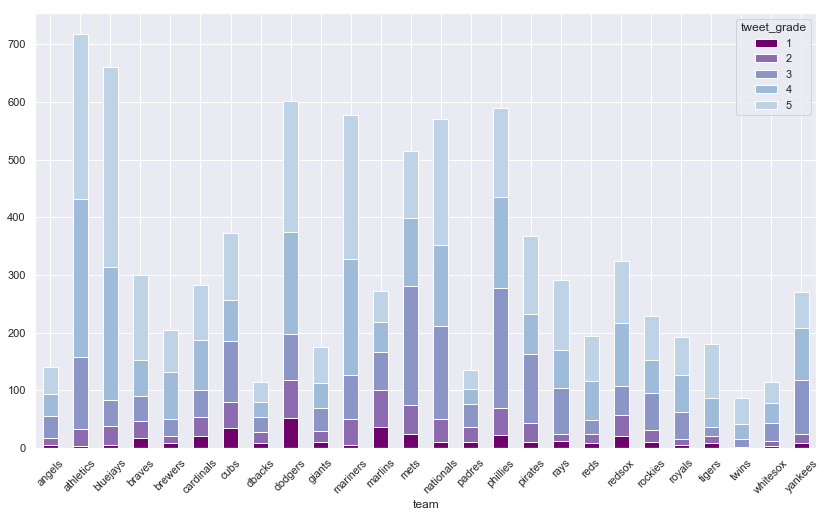

In [66]:
#https://pstblog.com/2016/10/04/stacked-charts, also from stackoverflow
colors=["#6e016b","#8c6bb1", "#8c96c6", "#9ebcda","#bfd3e6"]
bar_df.groupby('team')['tweet_grade']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True,color=colors, figsize=(14,8))
plt.xticks(rotation=45)